# <font color='#eb3483'> Intro to Dataset </font>

### Variables description

- **var1**: ...
- **var2**: ...

### Loading ...

In [ ]:
# import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [ ]:
# To display the top 5 rows
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Overview

In [ ]:
# shape
df.shape

(918, 12)

In [ ]:
# columns
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Checking the data types
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [ ]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
df.RestingECG.value_counts(normalize=True)

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64

In [ ]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df.ExerciseAngina.value_counts(normalize=True)

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64

In [ ]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df.ST_Slope.value_counts(normalize=True)

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

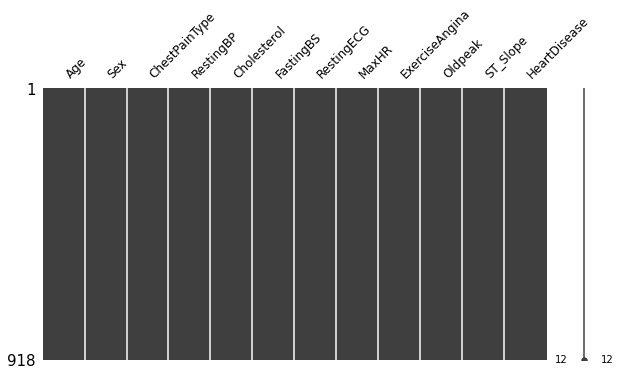

In [ ]:
# Checking the missing values
import missingno as msno
msno.matrix(df, figsize=(10,5), fontsize=12)

In [ ]:
# Percentage of missing values per column

In [ ]:
# Rows containing duplicate data
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
df[df.duplicated()].shape

(0, 12)

### Univariate analysis

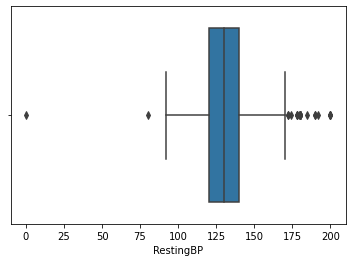

In [ ]:
# Outliers data (Boxplot)
sns.boxplot(x="RestingBP", data=df)

In [ ]:
# Checking for potential outliers
df.RestingBP.value_counts().sort_index()

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

In [ ]:
# Checking the 0 outlier
df[df.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
# Drop the 0 outlier
df = df[df.RestingBP != 0]

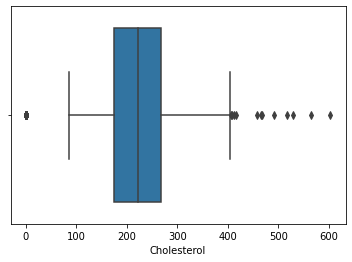

In [ ]:
# individual columns
sns.boxplot(x="Cholesterol", data=df)
plt.savefig('cholesteroloutliers.png')

In [ ]:
df['Cholesterol_D_zero'] = df.Cholesterol
df.loc[df['Cholesterol'] < 1, 'Cholesterol_D_zero'] = df[df.Cholesterol > 1].Cholesterol.median()

In [ ]:
# Checking for potential outliers
# df.Cholesterol.value_counts().sort_index()

In [ ]:
# Checking the 0 outliers - there are a lot?
df[df.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_D_zero
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1,237
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1,237
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1,237
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1,237
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1,237
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0,237
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1,237
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1,237


In [ ]:
df.Cholesterol.mean()

199.0163576881134

In [ ]:
# Number of unique values in some columns
df.FastingBS.value_counts().sort_index()

0    703
1    214
Name: FastingBS, dtype: int64

In [ ]:
# View histograms


### Bivariate analysis

In [ ]:
# HeatMap on correlation of numerical data
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
correlations = df[numeric_cols].corr()
correlations

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263084,-0.095142,0.198170,-0.382280,0.258563,0.282012
RestingBP,0.263084,1.000000,0.089392,0.067823,-0.109693,0.174252,0.117990
Cholesterol,-0.095142,0.089392,1.000000,-0.262585,0.237705,0.051390,-0.231479
FastingBS,0.198170,0.067823,-0.262585,1.000000,-0.131067,0.053062,0.267994
MaxHR,-0.382280,-0.109693,0.237705,-0.131067,1.000000,-0.161213,-0.401410
Oldpeak,0.258563,0.174252,0.051390,0.053062,-0.161213,1.000000,0.403638
HeartDisease,0.282012,0.117990,-0.231479,0.267994,-0.401410,0.403638,1.000000


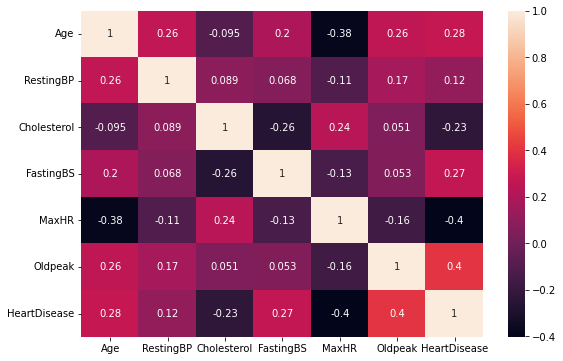

In [ ]:
# shows how numerical data is being correlated with each other
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data = correlations, annot=True)

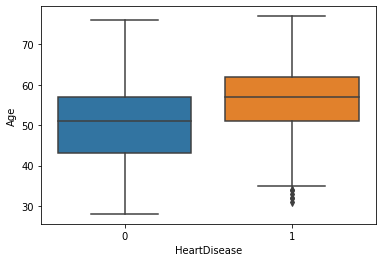

In [ ]:
sns.boxplot(y='Age',x='HeartDisease',data=df)

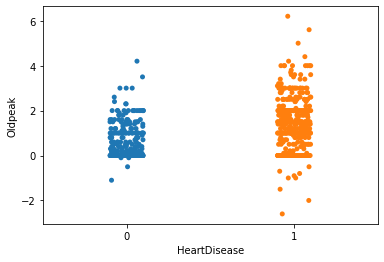

In [ ]:
#Next few plots display the difference in features for those with and without Heart Disease
sns.stripplot(x='HeartDisease',y='Oldpeak',data=df)

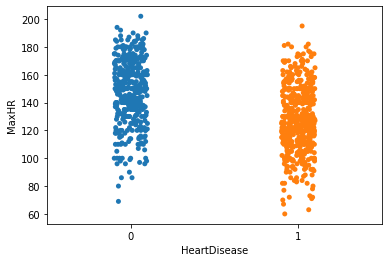

In [ ]:
sns.stripplot(x='HeartDisease',y='MaxHR',data=df)

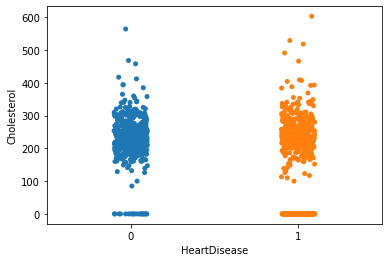

In [ ]:
sns.stripplot(x='HeartDisease',y='Cholesterol',data=df)

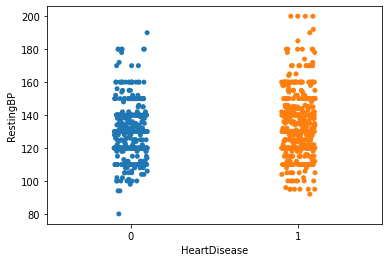

In [ ]:
sns.stripplot(x='HeartDisease',y='RestingBP',data=df)

In [ ]:
# View histogram for bivariates

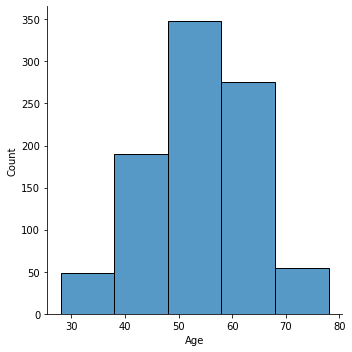

In [ ]:
sns.displot(data=df, x='Age', binwidth=10, facet_kws=dict(margin_titles=True))
#print(df.Age.)

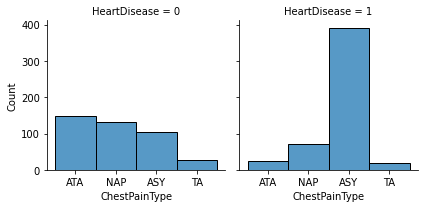

In [ ]:
# Seems like Heart Disease occurs much more often when ChestPainType is ASY
sns.displot(
    df, col="HeartDisease", x="ChestPainType",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

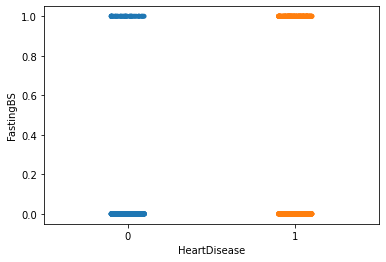

In [ ]:
sns.stripplot(x='HeartDisease',y='FastingBS',data=df)

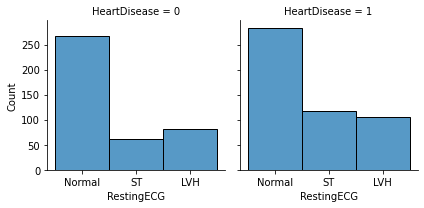

In [ ]:
#Not much of a correlation between Heart Disease and RestingECG
sns.displot(
    df, col="HeartDisease", x="RestingECG",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

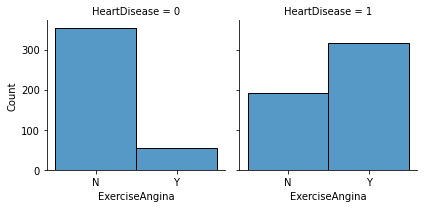

In [ ]:
#Those with Exercise Angina may be more prone to Heart Disease
sns.displot(
    df, col="HeartDisease", x="ExerciseAngina",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

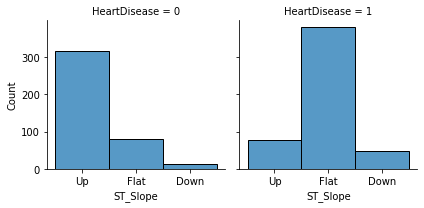

In [ ]:
#Flat ST_Slope occurs much more in those with heart disease
sns.displot(
    df, col="HeartDisease", x="ST_Slope",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

### Wrangling

In [ ]:
# Convert to correct data types ... 


In [ ]:
# Choose columns to discard and columns to keep despite missing values


In [ ]:
# Fill in missing/outlier values...

In [ ]:
# split date numerical/non-numeral

In [ ]:
# split train-test
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

knn = KNeighborsRegressor()

train, test = train_test_split(df[numeric_cols], test_size=0.2, random_state=12345)

print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 733 rows
Test set has 184 rows


In [ ]:
# standardize

In [ ]:
# create instance of model
model = KNeighborsRegressor()
model.fit(X=train.iloc[:,:-1], y=train.HeartDisease)
y_pred = model.predict(test.iloc[:, :-1])
mean_squared_error(y_true=test['HeartDisease'], y_pred=y_pred)

0.22586956521739135

In [ ]:
# train
mean_absolute_error(y_true=test['HeartDisease'], y_pred=y_pred)

0.3641304347826087

In [ ]:
# validate
r2_score(y_true=test['HeartDisease'], y_pred=y_pred)

0.09556002365464222

In [ ]:
# display metrics

Choose K

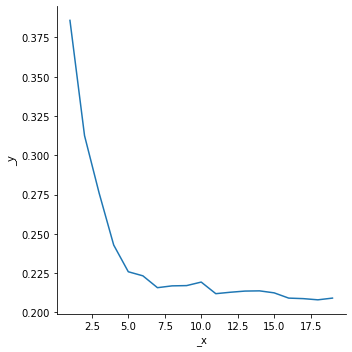

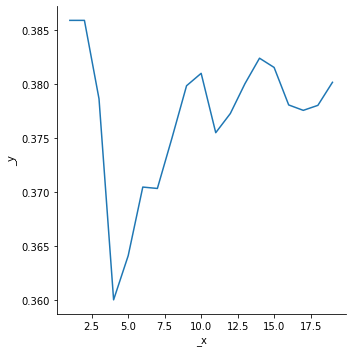

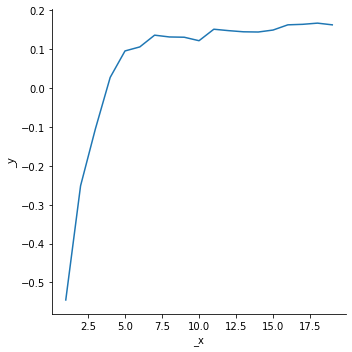

In [ ]:
#K Nearest neighbors from K = 1 to K = 20
k_neighbors = []
MSE = []
MAE = []
R2 = []
for k in range(1,20):
  knn = KNeighborsRegressor(n_neighbors = k)
  knn.fit(X=train.iloc[:,:-1], y=train.HeartDisease)
  y_pred = knn.predict(X=test.iloc[:,:-1])
  #print('K = ', k, '\t')
  k_neighbors.append(k)
  #print('MSE: ', mean_squared_error(y_true=test['HeartDisease'], y_pred=y_pred))
  #print('MAE: ', mean_absolute_error(y_true=test['HeartDisease'], y_pred=y_pred))
  MSE.append(mean_squared_error(y_true=test['HeartDisease'], y_pred=y_pred))
  #print('R^2: ', r2_score(y_true=test['HeartDisease'], y_pred=y_pred))
  R2.append(r2_score(y_true=test['HeartDisease'], y_pred=y_pred))
  MAE.append(mean_absolute_error(y_true=test['HeartDisease'], y_pred=y_pred))

sns.relplot(x = k_neighbors, y = MSE, kind='line')
sns.relplot(x = k_neighbors, y = MAE, kind='line')
sns.relplot(x = k_neighbors, y = R2, kind='line')

In [ ]:
# normalized the data so the graph won't look to scattered
# flip signs of R2 
MSE = np.array(MSE)
MAE = np.array(MAE)
R2 = np.array(R2)
met = pd.DataFrame({'k_neighbors':k_neighbors,
                   'MSE':MSE - MSE.mean(),
                   'R2':- (R2 - R2.mean()),
                  'MAE':MAE - MAE.mean()
                   })
met.head()
met_2 = pd.DataFrame({'k_neighbors':k_neighbors,
                   'MSE':MSE,
                   'R2': R2,
                  'MAE':MAE
                   })

In [ ]:
met.shape

(19, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


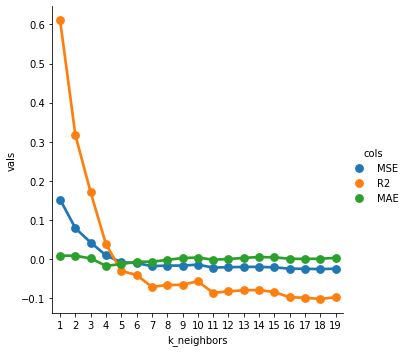

In [ ]:
met = met.melt('k_neighbors', var_name = 'cols', value_name = 'vals')
g = sns.factorplot(x = "k_neighbors", y = "vals", hue = 'cols', data = met)
# g.set(ylim=(-0.3, 0.5))

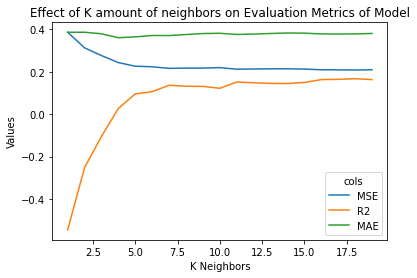

In [ ]:
met_2 = met_2.melt('k_neighbors', var_name = 'cols', value_name = 'vals')
g = sns.lineplot(x = "k_neighbors", y = "vals", hue = 'cols', data = met_2)
g.set_ylabel("Values", fontsize = 10)
g.set_xlabel("K Neighbors", fontsize = 10)
g.set(title='Effect of K amount of neighbors on Evaluation Metrics of Model')
plt.savefig('kneighbormodel.png')

### One Hot Encoding

In [ ]:
df_hot = pd.get_dummies(df)
df_hot.drop(columns=['Sex_F', 'ChestPainType_TA', 'RestingECG_Normal', 'ExerciseAngina_N', 'ST_Slope_Flat'], inplace=True)
df_hot.rename(columns={'Sex_M': 'Male', 'ChestPainType_ASY':'ChestPain_ASY', 'ChestPainType_ATA':'ChestPain_ATA', 'ChestPainType_NAP': 'ChestPain_NAP', 'ExerciseAngina_Y':'ExerciseAngina'}, inplace=True)
df_hot.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Cholesterol_D_zero,Male,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,RestingECG_LVH,RestingECG_ST,ExerciseAngina,ST_Slope_Down,ST_Slope_Up
0,40,140,289,0,172,0.0,0,289,1,0,1,0,0,0,0,0,1
1,49,160,180,0,156,1.0,1,180,0,0,0,1,0,0,0,0,0
2,37,130,283,0,98,0.0,0,283,1,0,1,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,214,0,1,0,0,0,0,1,0,0
4,54,150,195,0,122,0.0,0,195,1,0,0,1,0,0,0,0,1


In [ ]:
df_hot.dtypes

Age                     int64
RestingBP               int64
Cholesterol             int64
FastingBS               int64
MaxHR                   int64
Oldpeak               float64
HeartDisease            int64
Cholesterol_D_zero      int64
Male                    uint8
ChestPain_ASY           uint8
ChestPain_ATA           uint8
ChestPain_NAP           uint8
RestingECG_LVH          uint8
RestingECG_ST           uint8
ExerciseAngina          uint8
ST_Slope_Down           uint8
ST_Slope_Up             uint8
dtype: object

In [ ]:
df1 = df_hot.pop('HeartDisease') # remove column HeartDisease and store it in df1
df_hot['HeartDisease']=df1 # add HeartDisease as a 'new' column.
df_hot = df_hot.drop(columns='Cholesterol')

In [ ]:
df_hot.head()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,Cholesterol_D_zero,Male,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,RestingECG_LVH,RestingECG_ST,ExerciseAngina,ST_Slope_Down,ST_Slope_Up,HeartDisease
0,40,140,0,172,0.0,289,1,0,1,0,0,0,0,0,1,0
1,49,160,0,156,1.0,180,0,0,0,1,0,0,0,0,0,1
2,37,130,0,98,0.0,283,1,0,1,0,0,1,0,0,1,0
3,48,138,0,108,1.5,214,0,1,0,0,0,0,1,0,0,1
4,54,150,0,122,0.0,195,1,0,0,1,0,0,0,0,1,0


## Logistic Regression

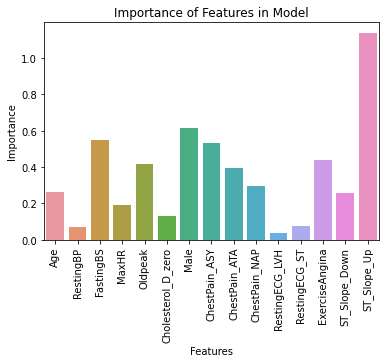

In [ ]:
#Logistic Regression Model using df_hot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df_hot.iloc[:,:-1], df_hot.HeartDisease, test_size=0.2, random_state=12345)

#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#fit movel
clf = LogisticRegression(penalty='none')
clf.fit(X=X_train, y=y_train) 

#chart showing importance of features in model
ax = sns.barplot(x=df_hot.columns[:-1], y=np.abs(clf.coef_[0]))
plt.xticks(rotation=90)
ax.set_xlabel("Features", fontsize = 10)
ax.set_ylabel("Importance", fontsize = 10)
ax.set(title='Importance of Features in Model')
plt.savefig('logisticregression.png')

In [ ]:
#Predict Logistic Regression Model
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)
pd.DataFrame(C, index=['actual0','actual1'], columns=['pred0','pred1'])

,pred0,pred1
actual0,76,13
actual1,12,83


In [ ]:
#Results for Logistic Regression Model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))

Accuracy:  0.8641304347826086
Precision:  0.8645833333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


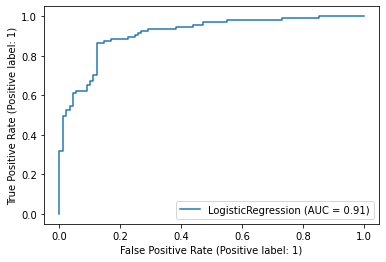

In [ ]:
metrics.plot_roc_curve(clf, X_test, y_test) # AUC closer to 1 the better

In [ ]:
y_prob = clf.predict_proba(X_test)
y_prob[:20,:]

array([[0.01860767, 0.98139233],
       [0.95546865, 0.04453135],
       [0.92644663, 0.07355337],
       [0.07425264, 0.92574736],
       [0.83942372, 0.16057628],
       [0.63854418, 0.36145582],
       [0.14863783, 0.85136217],
       [0.13624912, 0.86375088],
       [0.7187635 , 0.2812365 ],
       [0.23358547, 0.76641453],
       [0.46267163, 0.53732837],
       [0.60740439, 0.39259561],
       [0.58599747, 0.41400253],
       [0.07698334, 0.92301666],
       [0.07841452, 0.92158548],
       [0.96462072, 0.03537928],
       [0.00571889, 0.99428111],
       [0.52586178, 0.47413822],
       [0.6520942 , 0.3479058 ],
       [0.03705189, 0.96294811]])

In [ ]:
metrics.roc_auc_score(y_test, y_prob[:,1]) 

0.9121230041395624

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=275, max_features= 2, oob_score=True)
rf.fit(X=df_hot.iloc[:,:-1], y=df_hot.HeartDisease)
y_pred = rf.predict(df_hot.iloc[:,:-1])

from sklearn.metrics import confusion_matrix 
C = confusion_matrix(df_hot.HeartDisease, y_pred)
pd.DataFrame(C, index=['actual0','actual1'], columns=['pred0','pred1'])

,pred0,pred1
actual0,410,0
actual1,0,507


In [ ]:
rf.oob_score_

0.8658669574700109

[Text(0.5, 1.0, 'Importance of Features in Model')]

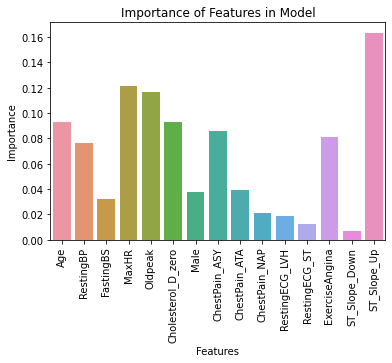

In [ ]:
ax = sns.barplot(x=df_hot.columns[:-1], y=rf.feature_importances_)
ax.set_xticklabels(labels=df_hot.columns[:-1], rotation=90)
ax.set_xlabel("Features", fontsize = 10)
ax.set_ylabel("Importance", fontsize = 10)
ax.set(title='Importance of Features in Model')

In [ ]:
def get_oob_scores(estimator, X, y, min_trees=20, max_trees=1000, step=10):
    oob_score = []
    estimator.set_params(oob_score=True, warm_start=True, random_state=12345)
    
    for i in range(min_trees, max_trees + 1, step):
        estimator.set_params(n_estimators=i)
        estimator.fit(X, y)
        oob_score.append(estimator.oob_score_)

    return pd.DataFrame({'trees': np.arange(min_trees, max_trees+1, step), 
                         'accuracy': oob_score})
    
rf_model = RandomForestClassifier(max_features = 'sqrt')
rf_scores = get_oob_scores(rf_model, X=df_hot.iloc[:,:-1], y=df_hot.HeartDisease)

In [ ]:
sns.lineplot(x='trees', y='accuracy', data=rf_scores)


### Random forest without 4 least important features

In [ ]:
df_hot_rem=df_hot.drop(columns=['ST_Slope_Down', 'RestingECG_ST', 'RestingECG_LVH', 'ChestPain_NAP'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, max_features= 2, oob_score=True)
rf.fit(X=df_hot_rem.iloc[:,:-1], y=df_hot_rem.HeartDisease)
y_pred = rf.predict(df_hot_rem.iloc[:,:-1])

from sklearn.metrics import confusion_matrix 
C = confusion_matrix(df_hot_rem.HeartDisease, y_pred)
pd.DataFrame(C, index=['actual0','actual1'], columns=['pred0','pred1'])

In [ ]:
rf.oob_score_

In [ ]:
p=sns.barplot(x=df_hot_rem.columns[:-1], y=rf.feature_importances_)
p = p.set_xticklabels(labels=df_hot_rem.columns[:-1], rotation=90)

In [ ]:
def get_oob_scores(estimator, X, y, min_trees=20, max_trees=1000, step=10):
    oob_score = []
    estimator.set_params(oob_score=True, warm_start=True, random_state=12345)
    
    for i in range(min_trees, max_trees + 1, step):
        estimator.set_params(n_estimators=i)
        estimator.fit(X, y)
        oob_score.append(estimator.oob_score_)

    return pd.DataFrame({'trees': np.arange(min_trees, max_trees+1, step), 
                         'accuracy': oob_score})
    
rf_model = RandomForestClassifier(max_features = 'sqrt')
rf_scores = get_oob_scores(rf_model, X=df_hot_rem.iloc[:,:-1], y=df_hot_rem.HeartDisease)

In [ ]:
sns.lineplot(x='trees', y='accuracy', data=rf_scores)

Support Vector Machines

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
numerical_cols  = df.select_dtypes(include= ['int32', 'int64', 'float'])
numerical_cols.head(5)

In [ ]:
cat_cols = df.select_dtypes(include= ['object'])
cat_cols.head(5)
# create encoding for categorical columns

In [ ]:
# encoding...get_dummies()

In [ ]:
df["Sex"].value_counts()

In [ ]:
df["Sex"].replace({"M": 1, "F": 0}, inplace=True) # use encoding - label encoding or one hot encoding

In [ ]:
df["ChestPainType"].value_counts()

In [ ]:
df["ChestPainType"].replace({"ASY": 3, "NAP": 2, "ATA": 1, "TA": 0}, inplace=True)

In [ ]:
df["RestingECG"].value_counts()

In [ ]:
df["RestingECG"].replace({"Normal": 2, "LVH": 1, "ST": 0}, inplace=True)

In [ ]:
df["ExerciseAngina"].value_counts()

In [ ]:
df["ExerciseAngina"].replace({"N": 1, "Y": 0}, inplace=True)

In [ ]:
df["ST_Slope"].value_counts()

In [ ]:
df["ST_Slope"].replace({"Flat": 2, "Up": 1, "Down": 0}, inplace=True)

In [ ]:
df.dtypes

In [ ]:
train, test = train_test_split(df, test_size=0.2, stratify=df.HeartDisease)
test.HeartDisease.value_counts()

In [ ]:
train.HeartDisease.value_counts()

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
svm = SVC(C = 1, kernel='linear')
svm.fit(X = train.iloc[:,:-1], y = train.HeartDisease)

In [ ]:
y_pred = svm.predict(test.iloc[:,:-1])
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(test.HeartDisease, y_pred))
print(accuracy_score(test.HeartDisease, y_pred))

In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracy = []
for C in C_values:
    clf = SVC(C = C, kernel='linear') # for a given value of C
    clf.fit(X = train.iloc[:,:-1], y = train.HeartDisease) # fit on training data
    y_pred = clf.predict(test.iloc[:,:-1]) # predict on test data
    accuracy.append( accuracy_score(test.HeartDisease, y_pred) ) # store the accuracy

pd.DataFrame( {'C':C_values,
               'Accuracy': accuracy}
            )

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'kernel': ['rbf'],    'C': [0.01, 0.1, 1, 10, 100], 'gamma':  [0.001, 0.01, 0.1, 1, 2]},
    {'kernel': ['poly'],   'C': [0.01, 0.1, 1, 10, 100], 'degree': [3,6,9,12]}]


svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=5)
clf.fit(X = df.iloc[:,:-1], y=df.HeartDisease)

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)[['param_C', 'param_gamma', 'mean_test_score', 'rank_test_score']]
cv_results.sort_values('mean_test_score', ascending=False)

### Principal Components Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_hot_scaled = pd.DataFrame(scaler.fit_transform(df_hot), columns = df_hot.columns)

In [ ]:
df_hot_scaled.mean()

In [ ]:
df_hot_scaled.head()

In [ ]:
df_hot_scaled.drop(columns=['HeartDisease'], inplace=True)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

pc_scores = pca.fit_transform(df_hot_scaled)
pc_scores = pd.DataFrame(pc_scores, columns=['PC'+str(i) for i in np.arange(1,df_hot_scaled.shape[1]+1)])

print('pc_scores has', pc_scores.shape[0], 'rows and', pc_scores.shape[1], 'columns')

pc_scores.head()

In [ ]:
pca.explained_variance_ratio_ 

In [ ]:
scree_data = pd.DataFrame({'Principal Component':['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'], 'Prop Variance Explained': pca.explained_variance_ratio_})
sns.pointplot(x="Principal Component", y="Prop Variance Explained", data=scree_data).set_title('Scree Plot')